# 1.Introduction

The data set used in this experiment is the Iris flower dataset. I hope to find out the different kinds of irises from the differences in flower sepals and differences in flower petals.

# 2.Data Summary

Iris flower dataset was compiled by Fisher in 1936, and I got it directly from sklearn, with 150 examples.

Iris flower dataset contains four features (length of flowerbed, width of flowerbed, length of petal, width of petal), and the characteristic values are positive floating point numbers in centimeters. The target value is the classification of irises (Iris Setosa, Iris Versicolour, Iris Virginica).

In [1]:
from sklearn.datasets import load_iris

iris_datas = load_iris()
n_samples,n_features= iris_datas.data.shape
print("Number of sample:", n_samples)
print("Number of feature:", n_features)
print("feature_names:", iris_datas.feature_names)
print("target_names:", iris_datas.target_names)

Number of sample: 150
Number of feature: 4
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


# 3.Exploratory Data Analysis (EDA)
## 3.1 Descriptive statistics

In [2]:
import pandas as pd

iris = pd.DataFrame(iris_datas.data, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 3.2 Visual analysis


In [4]:
df1 = pd.DataFrame(iris_datas.target, columns=['Species'])
df1.loc[(df1['Species'] == 0), 'Species'] = 'setosa'
df1.loc[(df1['Species'] == 1), 'Species'] = 'versicolor'
df1.loc[(df1['Species'] == 2), 'Species'] = 'virginica'
df_iris = pd.concat([iris,df1],axis=1)

#### Matplotlib

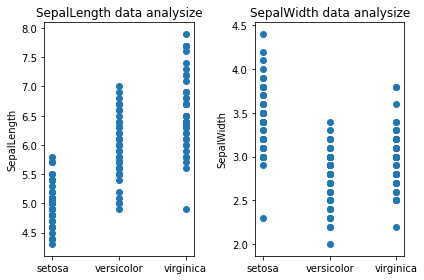

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.scatter(df_iris['Species'].values.tolist(), df_iris['SepalLength'].values.tolist())
plt.ylabel('SepalLength')
plt.title('SepalLength data analysize')

plt.subplot(1,2,2)
plt.scatter(df_iris['Species'].values.tolist(), df_iris['SepalWidth'].values.tolist())
plt.ylabel('SepalWidth')
plt.title('SepalWidth data analysize')

plt.tight_layout()
plt.show()

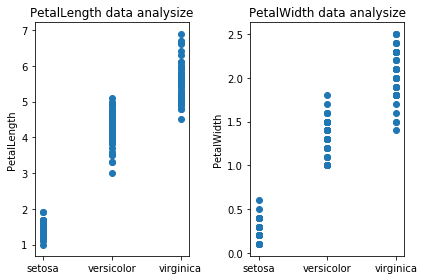

In [6]:
plt.subplot(1,2,1)
plt.scatter(df_iris['Species'].values.tolist(), df_iris['PetalLength'].values.tolist())
plt.ylabel('PetalLength')
plt.title('PetalLength data analysize')

plt.subplot(1,2,2)
plt.scatter(df_iris['Species'].values.tolist(), df_iris['PetalWidth'].values.tolist())
plt.ylabel('PetalWidth')
plt.title('PetalWidth data analysize')
plt.tight_layout()
plt.show()

#### Seaborn

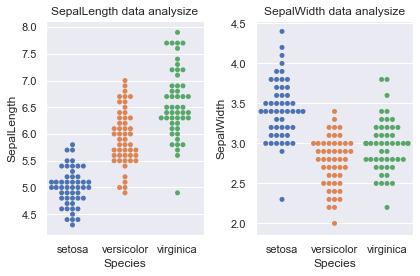

In [7]:
import seaborn as sns

sns.set()
plt.subplot(1,2,1)
sns.swarmplot(x='Species', y='SepalLength', data = df_iris)
plt.title('SepalLength data analysize')

plt.subplot(1,2,2)
sns.swarmplot(x='Species', y='SepalWidth', data = df_iris)
plt.title('SepalWidth data analysize')
plt.tight_layout()
plt.show()

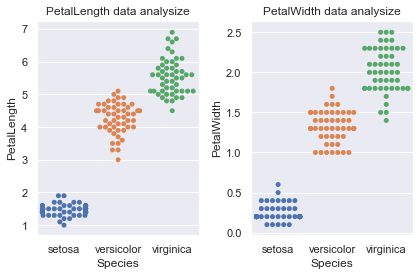

In [8]:
plt.subplot(1,2,1)
sns.swarmplot(x='Species', y='PetalLength', data = df_iris)
plt.title('PetalLength data analysize')

plt.subplot(1,2,2)
sns.swarmplot(x='Species', y='PetalWidth', data = df_iris)
plt.title('PetalWidth data analysize')
plt.tight_layout()
plt.show()

It can be clearly seen from this series of scatter plots that the two features of 'petalLength' and 'petalwidth' can effectively distinguish 'setosa'.

# 4.Inference

#### Matplotlib

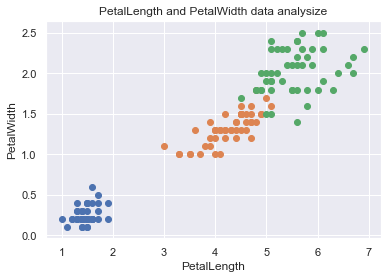

In [9]:
for index in ['setosa', 'versicolor', 'virginica']:
    x = df_iris.loc[df_iris['Species'] == index]['PetalLength']
    y = df_iris.loc[df_iris['Species'] == index]['PetalWidth']
    plt.scatter(x, y)
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.title('PetalLength and PetalWidth data analysize')
plt.show()

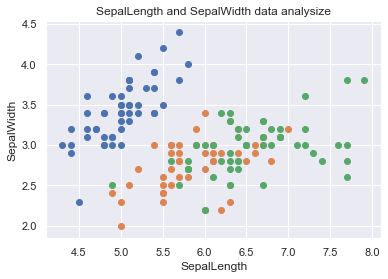

In [10]:
for index in ['setosa', 'versicolor', 'virginica']:
    x = df_iris.loc[df_iris['Species'] == index]['SepalLength']
    y = df_iris.loc[df_iris['Species'] == index]['SepalWidth']
    plt.scatter(x, y)
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.title('SepalLength and SepalWidth data analysize')
plt.show()

#### Seaborn

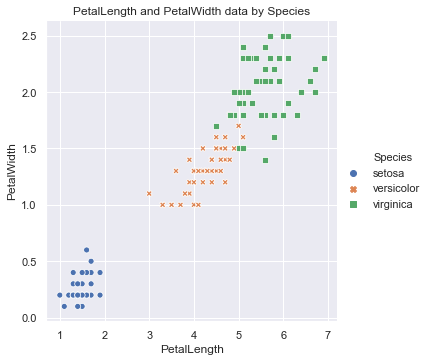

In [11]:
sns.relplot(x='PetalLength', y='PetalWidth', hue='Species', style='Species', data=df_iris)
plt.title('PetalLength and PetalWidth data by Species')
plt.show()

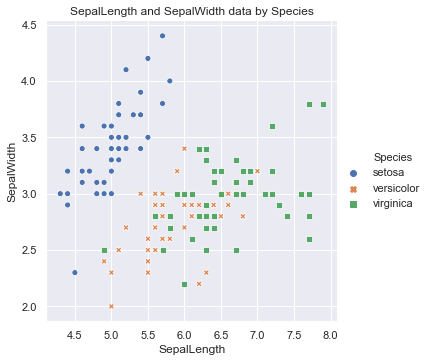

In [12]:
sns.relplot(x='SepalLength', y='SepalWidth', hue='Species', style='Species', data=df_iris )
plt.title('SepalLength and SepalWidth data by Species')
plt.show()

In the Fig'PetalLength and PetalWidth data by Species', the points of the same type of iris are basically gathered together, indicating that the length and width of the Petal have a strong relationship with the type of iris.
Next, an algorithm is used to prove the effect of these four features on the classification of irises.

#### Decision Tree model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y = df_iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy：', tree.score(X_test, y_test))

Accuracy： 1.0


# 5.Conclusion

Different types of irises can be distinguished according to the length of the sepal, the width of the sepal, the length of the petal, and the width of the petal.
It can be seen from the above series of scatter plots that the distribution of the three types of irises is basically not blended, so the four features of the irises have a strong relationship with the types of irises. Also, the classifier has an excellent predictive effect on the iris data, which also reflects the excellent data of the iris flower, that is, there is a clear logical relationship between the features of the data and the label.